In [ ]:
#get the dataset
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Income%20Data.csv

--2023-01-12 02:06:20--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/Income%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4145 (4.0K) [text/plain]
Saving to: ‘Income Data.csv’

Income Data.csv     100%[===================>]   4.05K  --.-KB/s    in 0s      

2023-01-12 02:06:20 (49.0 MB/s) - ‘Income Data.csv’ saved [4145/4145]



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Income Data.csv')

In [ ]:
df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


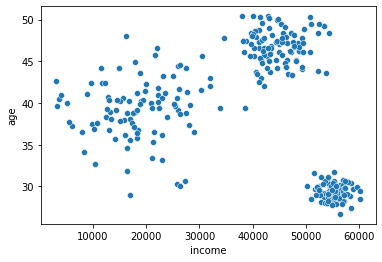

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='income',y='age',data=df)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)
km.fit(df)

result = df.copy() # create explicit copy of the dataframe
result['cluster_id'] = km.predict(df)
result.head()

,income,age,cluster_id
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


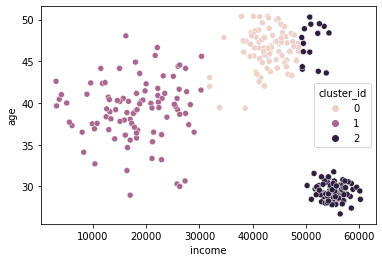

In [ ]:
sns.scatterplot(x='income',y='age',hue='cluster_id',data=result)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
result_df = ss.fit_transform(df)
result = result_df.copy()
result = pd.DataFrame(result, columns = df.columns)
km = KMeans(n_clusters=3, random_state=0)
km.fit(result)

result['cluster_id'] = km.predict(result)
result.head()

,income,age,cluster_id
0,0.097185,1.370164,2
1,0.906027,-1.379128,1
2,0.514050,1.103888,2
3,-1.271624,0.238494,0
4,-1.327621,-0.353969,0


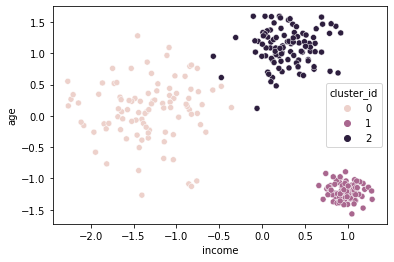

In [ ]:
sns.scatterplot(x='income',y='age',hue='cluster_id',data=result)
plt.show()

In [ ]:
km.cluster_centers_ # Return centroids

array([[-1.32005197,  0.09073855],
       [ 0.97471684, -1.20817959],
       [ 0.29682871,  1.08753708]])

In [ ]:
km.inertia_ # WSS

58.30120949883503

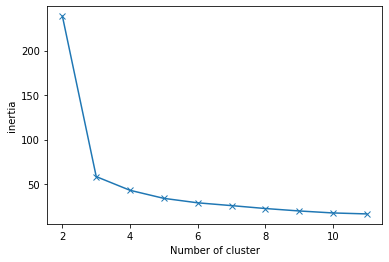

In [ ]:
#decide on number of clusters
# Elbow
ss = StandardScaler()
df_scaled = ss.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)



inertia = []
for i in range(2,12):
  km = KMeans(n_clusters=i)
  km.fit(df_scaled)
  inertia.append(km.inertia_)

plt.plot(range(2,12),inertia,marker='x')
plt.xlabel("Number of cluster")
plt.ylabel('inertia')
plt.show()

In [ ]:
# Clusters 3 and 4 is suitable with this data

In [ ]:
km.predict([[0.8,0.9]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
result_df = ss.fit_transform(df)
result = result_df.copy()
result = pd.DataFrame(result, columns = df.columns)
km = KMeans(n_clusters=3, random_state=0)
km.fit(result)

result['cluster_id'] = km.predict(result)
result.head()

,income,age,cluster_id
0,0.097185,1.370164,2
1,0.906027,-1.379128,1
2,0.514050,1.103888,2
3,-1.271624,0.238494,0
4,-1.327621,-0.353969,0


In [ ]:
df['cluster_id'] = result['cluster_id']

In [ ]:
df.head()

,income,age,cluster_id
0,41100.0,48.75,2
1,54100.0,28.10,1
2,47800.0,46.75,2
3,19100.0,40.25,0
4,18200.0,35.80,0


In [ ]:
df.groupby('cluster_id').agg(['mean'])

,income,age
,mean,mean
cluster_id,,
0,18321.649485,39.140206
1,55204.000000,29.384000
2,44308.737864,46.627184


# Hierarchial Clustering

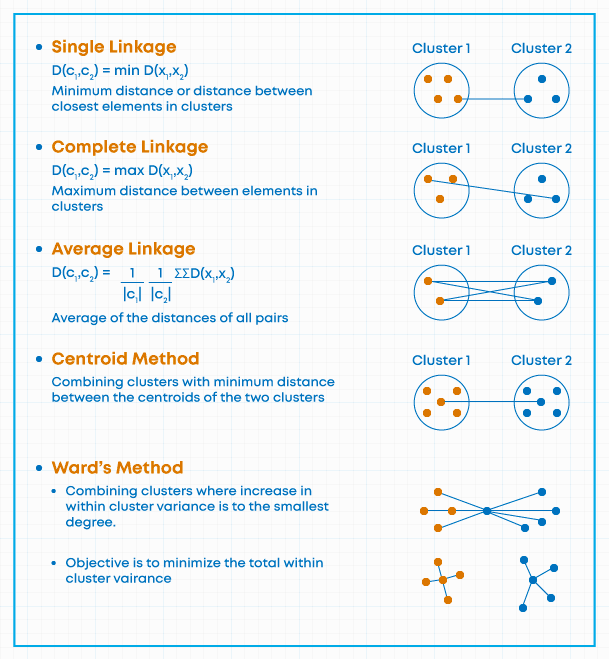

In [ ]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/beer.csv

--2023-01-12 02:51:51--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/beer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 612 [text/plain]
Saving to: ‘beer.csv’

beer.csv            100%[===================>]     612  --.-KB/s    in 0s      

2023-01-12 02:51:51 (22.0 MB/s) - ‘beer.csv’ saved [612/612]



In [ ]:
beer = pd.read_csv('beer.csv')
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [ ]:
beer.set_index('name',inplace=True)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg = AgglomerativeClustering(n_clusters=3, linkage='single')
agg.fit_predict(beer)

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2])

In [ ]:
import scipy.cluster.hierarchy as shc

In [ ]:
beer.index

Index(['Budweiser', 'Schlitz', 'Lowenbrau', 'Kronenbourg', 'Heineken',
       'Old_Milwaukee', 'Augsberger', 'Srohs_Bohemian_Style', 'Miller_Lite',
       'Budweiser_Light', 'Coors', 'Coors_Light', 'Michelob_Light', 'Becks',
       'Kirin', 'Pabst_Extra_Light', 'Hamms', 'Heilemans_Old_Style',
       'Olympia_Goled_Light', 'Schlitz_Light'],
      dtype='object', name='name')

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195]),
 <a list of 20 Text major ticklabel objects>)

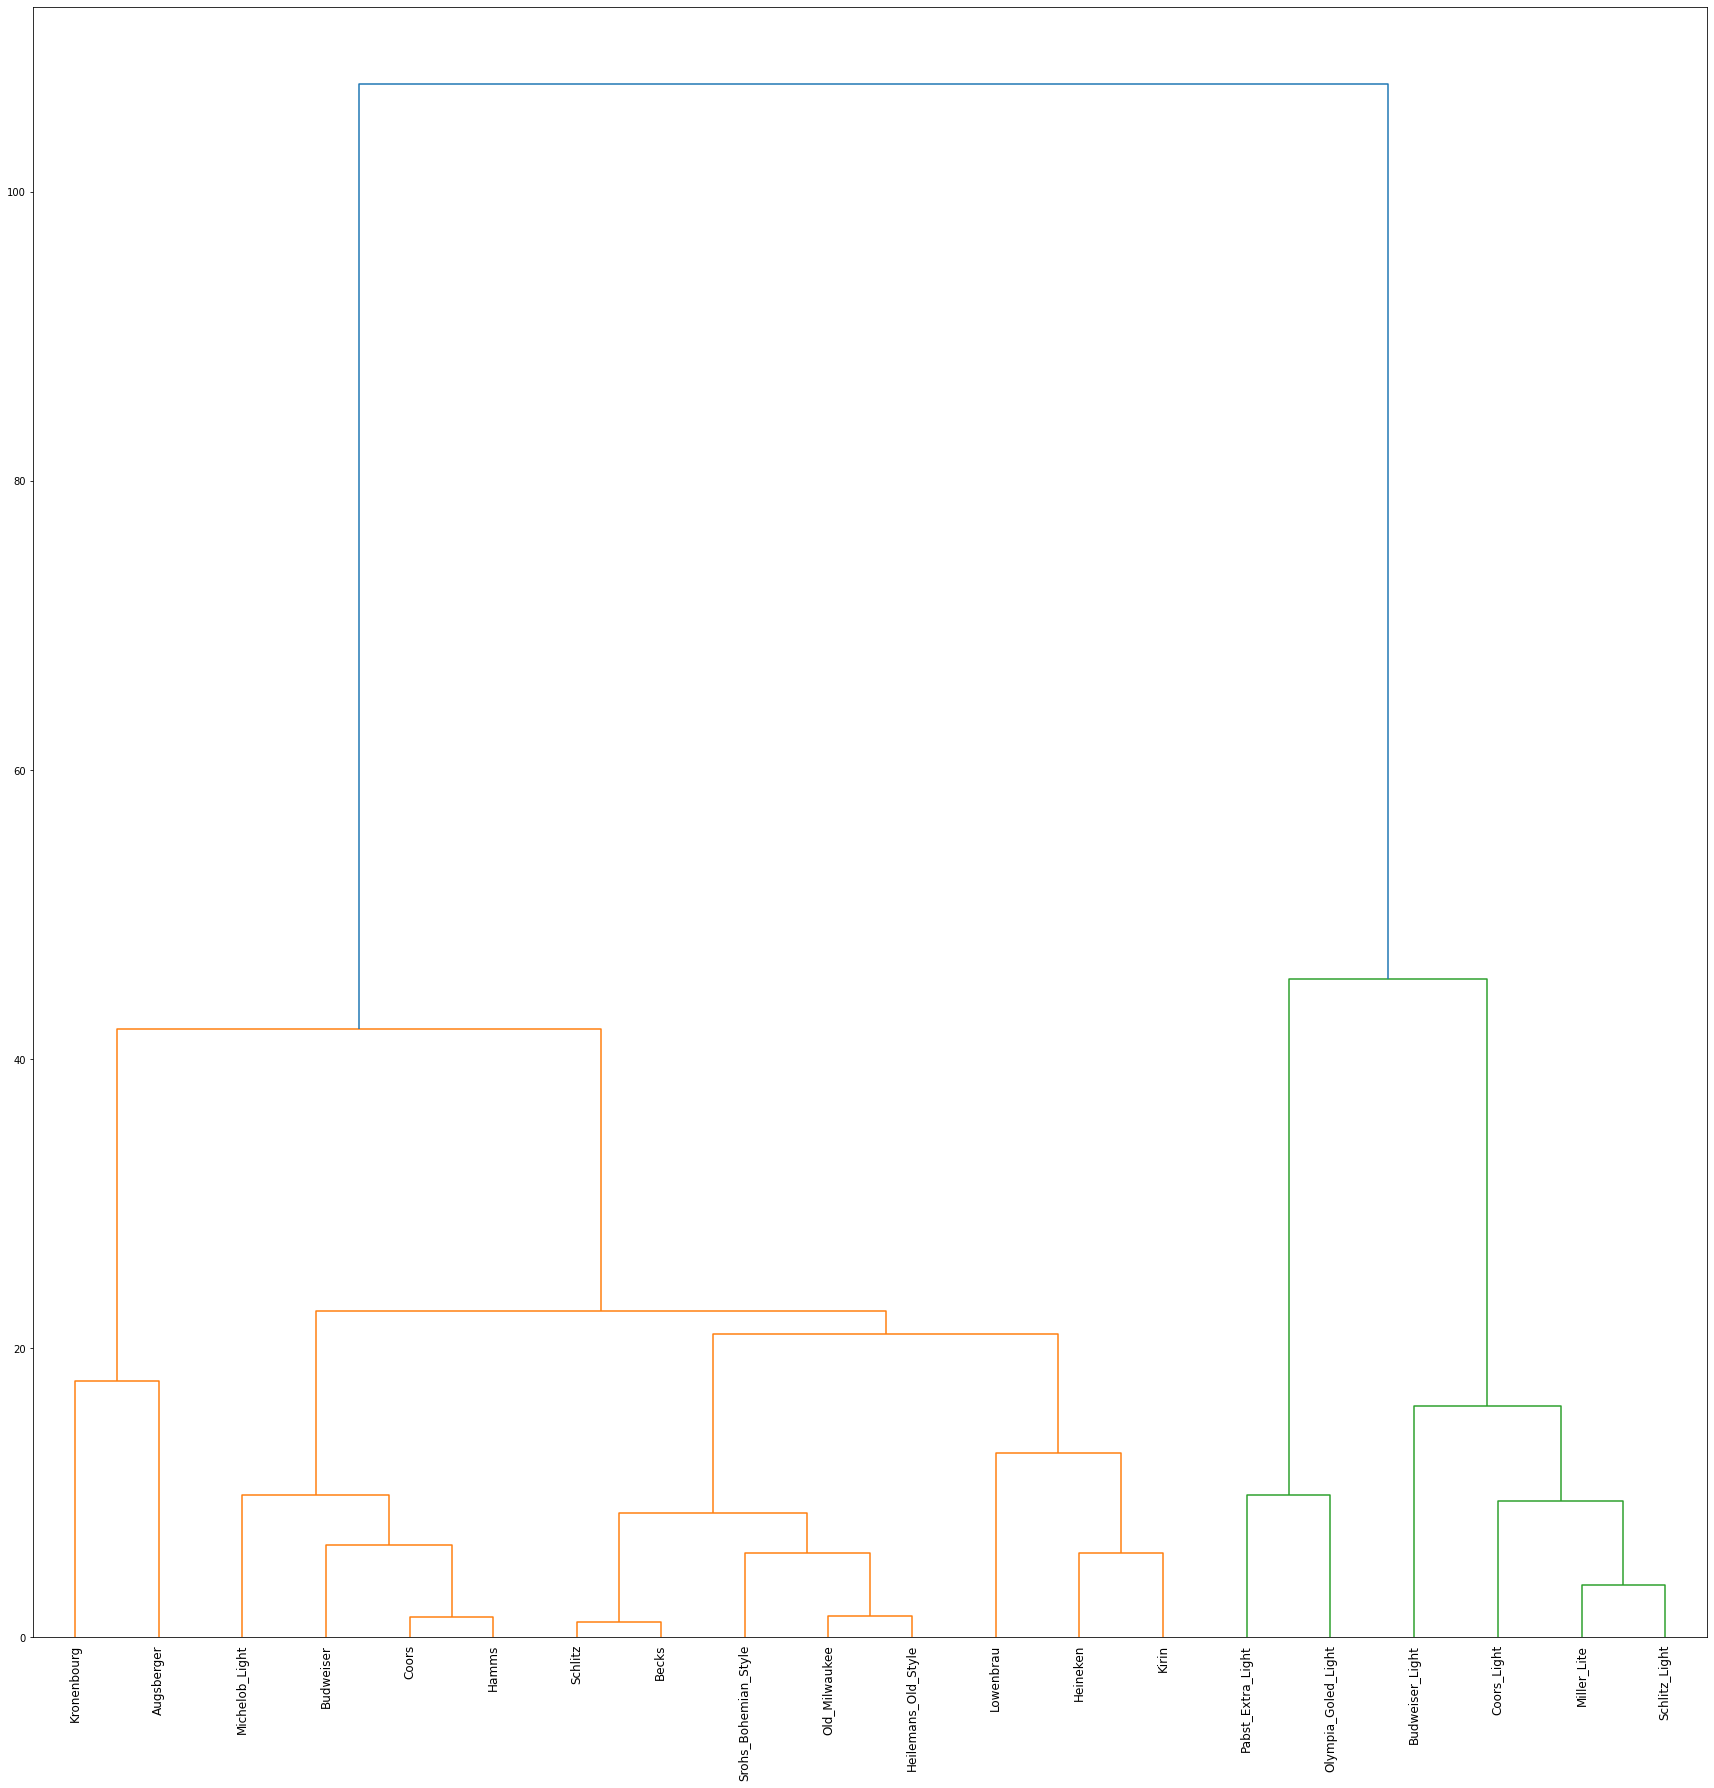

In [ ]:
plt.figure(figsize=(30,30))
dendrogram = shc.dendrogram(shc.linkage(beer, method='complete'), labels=beer.index)
plt.xticks(rotation=90)

In [ ]:
len(beer)

20